## PCA : Principal Component Analysis
Dimension Reduction technique

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('wine.data.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [4]:
from sklearn.decomposition import PCA

In [17]:
from sklearn.preprocessing import StandardScaler


Eigen value, eigan vector

Requries scaled data 

In [7]:
df.Class.unique()

array([1, 2, 3])

In [8]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [11]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
dfn = df.drop('Class', axis = 1)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
# scaling
scaler = StandardScaler()
dfs = scaler.fit_transform(dfn)

In [20]:
dfs

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 13))

In [25]:
pc = PCA()
df_pca = pc.fit_transform(dfs)

In [26]:
df_pca = pd.DataFrame(df_pca, columns = range(1,14))

In [29]:
df_pca

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416,0.146097,0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894,0.552427,0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235,-0.047024,-0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975,-0.390829,-0.057448,0.491490,0.299822,0.339821,-0.021866


In [30]:
eigen_values = pc.explained_variance_
print(eigen_values)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


In [ ]:
# How many principle component to select ?
- Kasier Rule
- Scree Plot

### Kaiser Rule ==> select those principle component whose values is more than 1


In [31]:
exp_variance = pc.explained_variance_ratio_
print(exp_variance)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


##### scree Plot
x - axis == no of components
y-axis == eigen values

In [32]:
import matplotlib.pyplot as plt

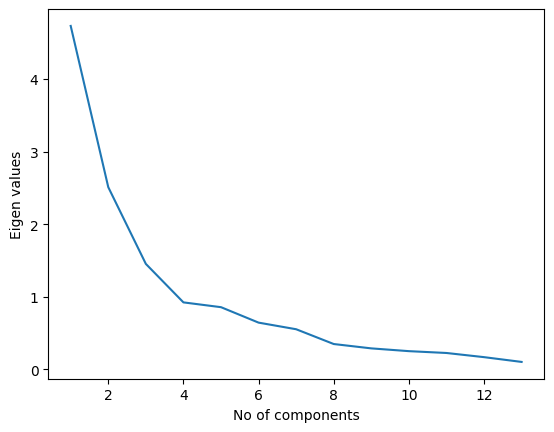

In [33]:
plt.plot(range(1,14), eigen_values)

plt.xlabel('No of components')
plt.ylabel('Eigen values')
plt.show()

In [35]:
df_m =df_pca.loc[:,0:4]  # loc[rows,columns]

In [37]:
df_m

,1,2,3,4
0,3.316751,1.443463,-0.165739,-0.215631
1,2.209465,-0.333393,-2.026457,-0.291358
2,2.516740,1.031151,0.982819,0.724902
3,3.757066,2.756372,-0.176192,0.567983
4,1.008908,0.869831,2.026688,-0.409766
...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527
174,-2.601956,1.757229,0.207581,0.349496
175,-2.677839,2.760899,-0.940942,0.312035
176,-2.387017,2.297347,-0.550696,-0.688285
